# 5.1 Learning Algorithms

$\textbf{5.1.4}$ Example: Linear Regression

Learner: $$\pmb{y} = \beta \pmb{1_m} + w_1 \pmb{x_1} + ... w_n \pmb{x_n}$$
where $\beta$ (bias) and $w_i$ are scalar parameters (to fit), and $\pmb{y, x_i} \in \mathbb{R}^{m \times 1}$ for $i$ = 1,2,..,$n$ are the target and feature columns, respectively, of the given data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
boston = load_boston()
boston.data[:4]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00]])

In [3]:
boston.target[:4]

array([24. , 21.6, 34.7, 33.4])

In [4]:
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [5]:
# we create an instance of a Linear Regressor
linreg = linear_model.LinearRegression(fit_intercept=True, normalize=True)

$$ \nabla_{\pmb{w}} \text{MSE}_\text{train} = 0 $$

$$ \Rightarrow \nabla_{\pmb{w}} \, \frac{1}{m} \, || \, \widehat{\pmb{y}}^\text{(train)} - \pmb{y}^\text{(train)} \, ||_2^2 = 0 $$

$$ \Rightarrow \pmb{w} = (\pmb{X}^{\text{(train)} \, \top} \pmb{X}^\text{(train)})^{-1} \pmb{X}^{\text{(train)} \, \top} \pmb{y}^\text{(train)} $$

In [6]:
#fit the model using the training data
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [7]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)
print("MSE between prediction and target")
print("(Mean Squared) Train Error: ", mean_squared_error(y_train, y_train_pred))
print("(Mean Squared) Test Error: ", mean_squared_error(y_test, y_test_pred), " (estimated Generalization Error)")

MSE between prediction and target
(Mean Squared) Train Error:  21.555648194527308
(Mean Squared) Test Error:  24.318238309170514  (estimated Generalization Error)


# 5.2 Capacity, Overfitting, and Underfitting

Increased Capacity (e.g. quadratic features): $$\pmb{y} = \beta \pmb{1_m} + w_1 \pmb{x_1} + ... w_n \pmb{x_n} + \sum_{i}^{n} \sum_{j}^{n} w_{in + j} \pmb{x_i x_j}$$

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
n = 2
poly2 = PolynomialFeatures(n,include_bias=False)

In [10]:
poly2_X_train = poly2.fit_transform(X_train)
poly2_X_test = poly2.fit_transform(X_test)

In [11]:
linreg.fit(poly2_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [12]:
y_train_pred = linreg.predict(poly2_X_train)
y_test_pred = linreg.predict(poly2_X_test)
print("MSE between prediction and target")
print("Train Error: ", mean_squared_error(y_train, y_train_pred))
print("Test Error: ", mean_squared_error(y_test, y_test_pred), " (estimated Generalization Error)")

MSE between prediction and target
Train Error:  5.582438040613098
Test Error:  14.239658272086333  (estimated Generalization Error)


In [13]:
poly_n_err = np.empty(shape=(0,3))

poly_order = 8
for i in range(1,poly_order):
    poly = PolynomialFeatures(i,include_bias=False)

    poly_X_train = poly.fit_transform(X_train)
    poly_X_test = poly.fit_transform(X_test)

    linreg.fit(poly_X_train, y_train)
    
    y_train_pred = linreg.predict(poly_X_train)
    y_test_pred = linreg.predict(poly_X_test)

    train_err = mean_squared_error(y_train, y_train_pred)
    test_err = mean_squared_error(y_test, y_test_pred)
    score = r2_score(y_test, y_test_pred)

    poly_n_err = np.append(poly_n_err, np.array([[train_err, test_err, score]]), axis=0)

[[2.15556482e+01 2.43182383e+01]
 [5.58243804e+00 1.42396583e+01]
 [4.91869631e-22 1.22986038e+04]
 [3.60601610e-24 5.61787829e+03]
 [2.04607100e-24 2.78339786e+03]
 [2.97062685e-24 1.86428341e+03]
 [8.94007422e-24 1.33097884e+03]]


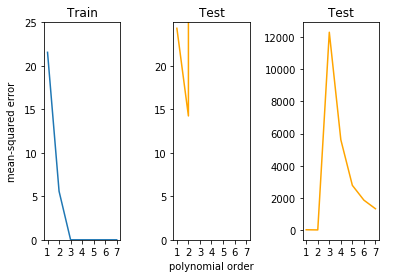

In [14]:
print(poly_n_err[:, :2])

fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

plt.subplots_adjust(wspace=0.7)

ax1 = fig.add_subplot(131)
ax1.plot(range(1,poly_order), poly_n_err[:,0])
plt.xticks(range(1,poly_order))
plt.title('Train')
plt.ylim([0, 25])

ax2 = fig.add_subplot(132)
ax2.plot(range(1,poly_order), poly_n_err[:,1],'orange')
plt.xticks(range(1,poly_order))
plt.yticks(range(0,23,5))
plt.title('Test')
plt.ylim([0, 25])

ax3 = fig.add_subplot(133)
ax3.plot(range(1,poly_order), poly_n_err[:,1],'orange')
plt.xticks(range(1,poly_order))
plt.title('Test')

ax.set_xlabel('polynomial order')
ax.set_ylabel('mean-squared error')

plt.show()

# 5.3 Hyperparameters and Validation Sets

Regularization: Minimmize $$J(\pmb{w}) = \text{MSE}_\text{train} + \lambda \pmb{w}^T \pmb{w} $$

In [15]:
# import linear regressor with l2 regularization
from sklearn.linear_model import Ridge

In [16]:
# alpha = lambda = 1.0
linreg_Ridge = linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=True, tol=1e-4)

In [17]:
# fit the 7th order polynomial
linreg_Ridge.fit(poly_X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.0001)

In [18]:
y_train_pred = linreg_Ridge.predict(poly_X_train)
y_test_pred = linreg_Ridge.predict(poly_X_test)
print("MSE between prediction and target for 7th degree features")
print("Train Error: ", mean_squared_error(y_train, y_train_pred))
print("Test Error: ", mean_squared_error(y_test, y_test_pred), " (estimated Generalization Error)")

MSE between prediction and target for 7th degree features
Train Error:  3.926231368289153
Test Error:  11.828806775996417  (estimated Generalization Error)


In [19]:
reg_err = np.empty(shape=(0,3))

reg_max = 3.0
for i in np.arange(0,reg_max,0.1):
    
    linreg_Ridge = linear_model.Ridge(alpha=i, fit_intercept=True, normalize=True, tol=1e-4)

    linreg_Ridge.fit(poly_X_train, y_train)
    
    y_train_pred = linreg_Ridge.predict(poly_X_train)
    y_test_pred = linreg_Ridge.predict(poly_X_test)

    train_err = mean_squared_error(y_train, y_train_pred)
    test_err = mean_squared_error(y_test, y_test_pred)

    reg_err = np.append(reg_err, np.array([[i,train_err, test_err]]), axis=0)
    
min_test_err_id = np.where(reg_err[:,2]==min(reg_err[:,2]))[0][0]
alpha_min = reg_err[min_test_err_id,0]
print(reg_err)

/home/josh/anaconda/envs/SINDy/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


[[0.00000000e+00 3.27657247e-17 1.33098167e+03]
 [1.00000000e-01 1.85630979e+00 4.33175032e+01]
 [2.00000000e-01 2.31480299e+00 2.32970468e+01]
 [3.00000000e-01 2.64129403e+00 1.61694916e+01]
 [4.00000000e-01 2.90385707e+00 1.31858771e+01]
 [5.00000000e-01 3.12647249e+00 1.18998628e+01]
 [6.00000000e-01 3.32098239e+00 1.14015897e+01]
 [7.00000000e-01 3.49433005e+00 1.12947654e+01]
 [8.00000000e-01 3.65103128e+00 1.13884547e+01]
 [9.00000000e-01 3.79423174e+00 1.15841893e+01]
 [1.00000000e+00 3.92623137e+00 1.18288068e+01]
 [1.10000000e+00 4.04877302e+00 1.20927731e+01]
 [1.20000000e+00 4.16321428e+00 1.23594701e+01]
 [1.30000000e+00 4.27063605e+00 1.26195929e+01]
 [1.40000000e+00 4.37191441e+00 1.28680848e+01]
 [1.50000000e+00 4.46777009e+00 1.31023986e+01]
 [1.60000000e+00 4.55880357e+00 1.33214823e+01]
 [1.70000000e+00 4.64552063e+00 1.35251730e+01]
 [1.80000000e+00 4.72835137e+00 1.37138286e+01]
 [1.90000000e+00 4.80766465e+00 1.38881019e+01]
 [2.00000000e+00 4.88377920e+00 1.404879

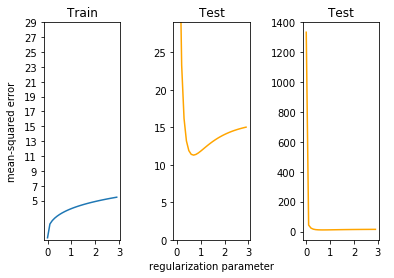

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

plt.subplots_adjust(wspace=0.7)

ax1 = fig.add_subplot(131)
ax1.plot(reg_err[:,0], reg_err[:,1])
plt.xticks([0, 1, 2, 3])
plt.yticks(range(5,30,2))
plt.title('Train')

ax2 = fig.add_subplot(132)
ax2.plot(reg_err[:,0], reg_err[:,2],'orange')
plt.xticks([0, 1, 2, 3])
#plt.yticks(range(5,30,2))
plt.title('Test')
plt.ylim([0, 29])

ax2 = fig.add_subplot(133)
ax2.plot(reg_err[:,0], reg_err[:,2],'orange')
plt.xticks([0, 1, 2, 3])
#plt.yticks(range(5,30,2))
plt.title('Test')

ax.set_xlabel('regularization parameter')
ax.set_ylabel('mean-squared error')

plt.show()

K-fold Cross-Validation

In [21]:
from sklearn.model_selection import KFold

In [22]:
split_num = 10
n_errs = np.empty(shape=(1,split_num))

kf = KFold(n_splits = split_num)
kf.get_n_splits(poly_X_train)

linreg_Ridge_opt = linear_model.Ridge(alpha = alpha_min, fit_intercept=True, normalize=True, tol=1e-4)

i = 0
for train_index, test_index in kf.split(poly_X_train, y_train):
    linreg_Ridge_opt.fit(poly_X_train[train_index],y_train[train_index])
    n_errs[0,i] = mean_squared_error(y_train[test_index], linreg_Ridge_opt.predict(poly_X_train[test_index]))
    i = i+1

In [23]:
print(n_errs)
print(sum(n_errs[0])/len(n_errs[0]))

[[48.27572232 83.10809635 21.11004131 19.76973478  8.5643428  63.80445846
  19.03767704  5.61795224 17.63496428 15.89164314]]
30.281463271156536
